## Assignment 10

Author: Anjani Bonda<br>
Date: 5/20/2023<br>

### Assignment 10.1

In the first part of the assignment, you will implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs.

#### Assignment 10.1.a
Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.

```
def tokenize(sentence):
    tokens = []
    # tokenize the sentence
    return tokens
```

In [1]:
import string

def tokenize(sentence):
    # standardize text to lowercase
    sentence = sentence.lower()
    # remove any punctuation
    sentence = "".join(char for char in sentence if char not in string.punctuation)   
    # split words into tokens
    return sentence.split()

In [2]:
sentence = "Hello Everyone! Welcome to Bellevue University - DSC650 program"
sentence

'Hello Everyone! Welcome to Bellevue University - DSC650 program'

In [3]:
tokenized_text = tokenize(sentence)
tokenized_text

['hello',
 'everyone',
 'welcome',
 'to',
 'bellevue',
 'university',
 'dsc650',
 'program']

#### Assignment 10.1.b

Implement an `ngram` function that splits tokens into N-grams. 

```
def ngram(tokens, n):
    ngrams = []
    # Create ngrams
    return ngrams
```

In [6]:
def ngram(tokens, n):
    # zipping tokens into ngrams
    temp = zip(*[tokens[x:] for x in range(0, n)])
    
    # join the ngrams
    return [" ".join(ngram) for ngram in temp]

In [7]:
# Assign words/ngrams into a list where n=1 and print
unigram = ngram(tokenized_text, 1)
unigram

['hello',
 'everyone',
 'welcome',
 'to',
 'bellevue',
 'university',
 'dsc650',
 'program']

In [10]:
# Assign ngrams in triplets into a list and print
trigram = ngram(tokenized_text, 3)
trigram

['hello everyone welcome',
 'everyone welcome to',
 'welcome to bellevue',
 'to bellevue university',
 'bellevue university dsc650',
 'university dsc650 program']

#### Assignment 10.1.c

Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.

```
def one_hot_encode(tokens, num_words):
    token_index = {}
    results = ''
    return results
```

In [11]:
# Import required library/libraries
import numpy as np

In [12]:
def one_hot_encode(tokens, num_words):
    # build index of the tokens
    token_index = {}
    for word in tokens:
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
    # vectorize tokens
    max_length = 10
    # create vector of zeros
    results = np.zeros(shape=(max_length,max(token_index.values()) + 1))
    # One_hot_encode the words to the vector - results
    for x, word in list(enumerate(tokens))[:max_length]:
        index = token_index.get(word)
        results[x, index] = 1
    return results

In [13]:
one_hot_text = one_hot_encode(tokenized_text, 100)
one_hot_text

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Assignment 10.2

Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [15]:
## Import required library/libraries.
import os

In [12]:
# Process labels of the IMDB dataset
imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [13]:
# Tokenizing the text and prepare a train/val split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 
training_samples = 200 
validation_samples = 10000
max_words = 10000 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices) # shuffle data before splitting
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [14]:
# Train the model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

embedding_dim = 100

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Compile and train the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 158ms/step - loss: 0.6882 - acc: 0.4850 - val_loss: 0.6966 - val_acc: 0.5147
Epoch 2/10
7/7 [==============================] - 1s 113ms/step - loss: 0.4924 - acc: 0.9800 - val_loss: 0.6991 - 

Evaluate the model on test data

In [15]:
# Tokenize the data of the test set
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

Plot the model's performance over time:

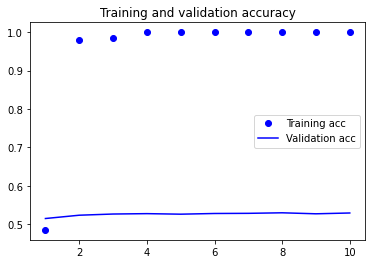

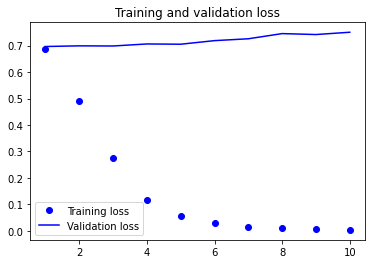

In [16]:
# Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Evaluate the model

In [17]:
# Evaluate the model on the test set
eval = model.evaluate(x_test, y_test)
print(f"Model Loss:     {eval[0]:.3f}")
print(f"Model Accuracy: {eval[1]*100:.1f}%")

782/782 [==============================] - 2s 2ms/step - loss: 0.7586 - acc: 0.5310
Model Loss:     0.759
Model Accuracy: 53.1%


#### Assignment 10.3

Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [18]:
# Use the LSTM layer in Keras
from keras.layers import LSTM

max_features = 10000 # Number of words to consider as features

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 1s 255ms/step - loss: 0.6937 - acc: 0.4688 - val_loss: 0.6913 - val_acc: 0.6000
Epoch 2/10
2/2 [==============================] - 0s 90ms/step - loss: 0.6889 - acc: 0.8188 - val_loss: 0.6906 - val_acc: 0.6000
Epoch 3/10
2/2 [==============================] - 0s 70ms/step - loss: 0.6843 - acc: 0.8750 - val_loss: 0.6904 - val_acc: 0.6500
Epoch 4/10
2/2 [==============================] - 0s 74ms/step - loss: 0.6780 - acc: 0.9062 - val_loss: 0.6897 - val_acc: 0.5750
Epoch 5/10
2/2 [==============================] - 0s 81ms/step - loss: 0.6687 - acc: 0.9438 - val_loss: 0.6890 - val_acc: 0.5500
Epoch 6/10
2/2 [==============================] - 0s 75ms/step - loss: 0.6551 - acc: 0.9438 - val_loss: 0.6873 - val_acc: 0.5500
Epoch 7/10
2/2 [==============================] - 0s 78ms/step - loss: 0.6323 - acc: 0.9688 - val_loss: 0.6849 - val_acc: 0.5000
Epoch 8/10
2/2 [==============================] - 0s 75ms/step - loss: 0.5867 - acc: 0.9750 - va

Plot the LSTM model's performance over time

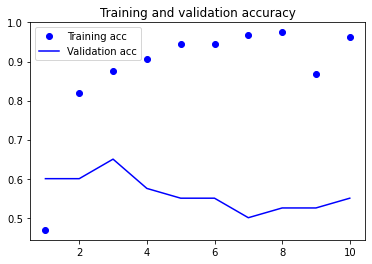

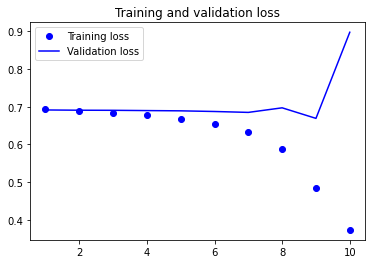

In [19]:
# Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Evaluate the LSTM model

In [21]:
# Evaluate the model on the test set
eval = model.evaluate(x_test, y_test)
print(f"Model Loss:     {eval[0]:.3f}")
print(f"Model Accuracy: {eval[1]*100:.1f}%")

782/782 [==============================] - 14s 18ms/step - loss: 0.8248 - acc: 0.5749
Model Loss:     0.825
Model Accuracy: 57.5%


#### Assignment 10.4

Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

Example 1D convnet for the IMDB dataset

In [22]:
# Train and evaluate a simple 1D convnet on the IMDB data
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

max_len = 100 # set to match dimensions

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

Plot the 1D convnet model's performance over time

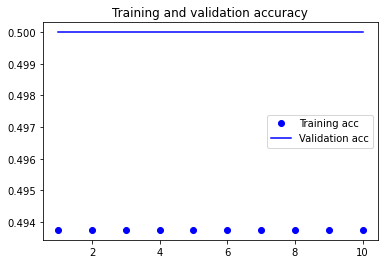

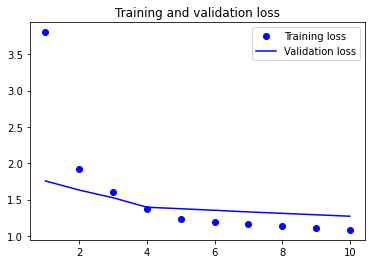

In [23]:
# Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
# Evaluate the model on the test set
eval = model.evaluate(x_test, y_test)
print(f"Model Loss:     {eval[0]:.3f}")
print(f"Model Accuracy: {eval[1]*100:.1f}%")

782/782 [==============================] - 3s 4ms/step - loss: 1.2980 - acc: 0.5000
Model Loss:     1.298
Model Accuracy: 50.0%
